In [4]:
from dash import Dash, dcc, html
import plotly.express as px

In [3]:
app = Dash(__name__)

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("dash_test").getOrCreate()
df = spark.createDataFrame([
    ("test_topic", "Test Topic"),
    ("second_topic", "abc"),
    ("test_topic", "Another Test Topic")
], ["topic", "value"])

In [18]:
df.show()
df.printSchema()

+------------+------------------+
|       topic|             value|
+------------+------------------+
|  test_topic|        Test Topic|
|second_topic|               abc|
|  test_topic|Another Test Topic|
+------------+------------------+

root
 |-- topic: string (nullable = true)
 |-- value: string (nullable = true)



In [29]:
df_test = df.groupBy("topic").count()
df_test.printSchema()

root
 |-- topic: string (nullable = true)
 |-- count: long (nullable = false)



### Start Dash

In [32]:
pd = df_test.toPandas()

fig = px.bar(pd, x="topic", y="count")

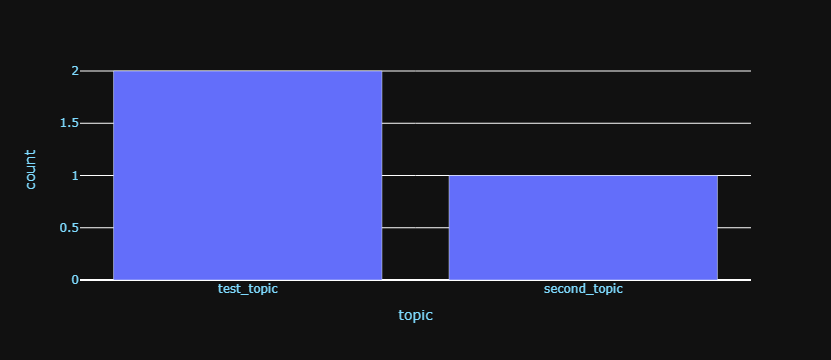

In [33]:
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

fig.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)

In [ ]:
app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Hello Dash',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),

    html.Div(children='Dash: A web application framework for your data.', style={
        'textAlign': 'center',
        'color': colors['text']
    }),

    dcc.Graph(
        id='example-graph-2',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)